# Introduction -- Reminder

Each Python lab will start with a pre-flight exercise that walks through building some of the set up and tools ($\sim$ 30 min), followed by an in-class tutorial with time for Q+A (50 min) so you can walk through steps that will be necessary for the homework assignment you will submit ($\sim$ 3 hrs).  Each lab will contain starter code, similar to what you see below.  Please fill in the code to complete the pre-flight assignment in preparation for the in-class tutorial.  

Preflight ($\sim$30-60 min, 10 points) **Typically due: Wednesdays 3pm EST**

*Preflight typically graded by Wednesday 5p EST*

In-class tutorial and Q+A ($\sim$ 50 min, 10 points) **Typically occurs: Thursdays 9am EST**

Homework assignment ($\sim$ 3-5 hrs, 30 points) **Typically due: Mondays 9am EST** 

*Homework typically graded by Thursday 5p*

When we grade your homework, we will not run your code. Once submitted, your notebook should have the outputs for all of your results.  Please do not include long outputs from debugging, beyond a few print statements and the requested visualizations (i.e. plots).

**Grading:** When we grade your notebook, we will convert the .ipynb file to an HTML file.  We will be using [nbgrader](https://nbgrader.readthedocs.io/en/stable/) to grade your notebooks.  **Note:** If your ```IPython``` version is too old, we will *not* be able to grade your assignments.


# Phys 260 Python Preflight 8: Integrating the Biot-Savart Law  (10 points total)

## Preflight Summary
- Brief review of the Biot-Savart law
- Review setting up the vector field with numpy tools (e.g. tools we used to calculate the electric field will be useful for the magnetic field: `np.meshgrid`, `np.linalg.norm`, `np.apply_along_axis`, etc.)
- Example python class for a line wire

In [1]:
import numpy as np
from matplotlib import pyplot as plt

## Brief Review of the Biot-Savart Law

The <b>Biot-Savart Law</b> describes how currents produce magnetic fields: 
\begin{equation}
       \mathbf{B}(\vec{r}) = \frac{\mu_0}{4\pi}\int\frac{I\,d\vec{\ell}\times ({\vec{r}-\vec{r}^{\prime})}}{|r-r^\prime|^3}
\end{equation}
In this expression, $\vec{r}$ is a field point (we use a `np.meshgrid` to sample field points), and the integral runs over all the currents, whose positions are labeled by the vector $\vec{r}^\prime$.  Recall, when discretized for numerical calculations, integrals act as sums.

The field point $\vec{r}$ is fixed for a particular integration (sum). In general, this integral is difficult to evaluate analytically. This is why most introductory courses, like Phys260, typically restrict to examples with symmetries, like infinite straight wires, or the axis of symmetry of a loop. Computers have no such limitations, as we can sample over any configuration, regardless of symmetry (recall how we calculated the electric field due to a rectangular prism of charge).

The Biot-Savart Law bears a strong mathematical resemblance to Coulomb's Law.  Consequently, we will use a similar numerical approach to integrating the Biot-Savart Law. You may want to refer to the first two homework assignments to refresh your memory of how we did electric field calculations.  We will also briefly review some of the numpy tools below.

In this preflight, we will we will illustrate the numerical integration of the Biot-Savart Law for two cases where we can compare with the analytic solution.  In the tutorial/hw, we will explore more complex configurations.  

**Preflight**
- Building blocks to numerically solve the Biot-Savart Law for a given current configuration
- Magnetic field due to a line wire with current flowing

**Tutorial/HW**
- For the "more complex" scenarios, we will:
    - Mutliple line wires
    - Multiple loop wires
    
Note these cases have common code, and it benefits code writers, readers, and users to avoid redundant code.  One particluar step with common code is the code to calculate the magnetic field at a point due to any number of current elements, $Id\vec{l}$. 

### Review of relevant numpy tools 

Some folks have asked for additional material going over numpy axes and mentioned that the links tend to assume more familiarity with terminology or more previous exposure to python/programming in general.  One recommendation I would have is to check out brief youtube videos ($\sim$5 min) that go through these concepts. 

- [Here is a set](https://www.youtube.com/playlist?list=PL646EB79A149EC727) of videos on some core python concepts.  These are a bit outdated, but the biggest difference between 2011 and now is that the `print` statement now requires parentheses.  
- [Here is one](https://www.youtube.com/watch?v=nS0oKBbNjWY) to build intuition on n-d numpy arrays and what happens when you "collapse" along an axis.




#### Define the points we sample in the vector field (1 point)

In the cell below, define `points_in_meshgrid`, a numpy array of shape (3,20,20,20) comprised of x, y, z coordinates sampling 20 points along each axis between -2 and 2.  Use the 'ij' indexing (but keep in mind, the `streamplot` plotting method expects 'xy' indexing, so some axes will have to be switched).  Hint: Refer to tutorialhw2 for an example of defining `points_in_meshgrid`.

From tutorialhw2:
```
numpoints_1d = 10

sample_points = np.linspace(-3,3,num=numpoints_1d)

xarray, yarray, zarray = np.meshgrid(sample_points,
                                     sample_points,
                                     sample_points,
                                     indexing='ij'
                                    )

points_in_meshgrid = np.array([xarray, yarray, zarray])
sample_points.shape
```

In [6]:
# Define points_in_meshgrid here

### BEGIN SOLUTION
numpoints_1d = 20

sample_points = np.linspace(-2,2,num=numpoints_1d)

xarray, yarray, zarray = np.meshgrid(sample_points,
                                     sample_points,
                                     sample_points,
                                     indexing='ij'
                                    )

points_in_meshgrid = np.array([xarray, yarray, zarray])
### END SOLUTION

In [10]:
"""Execute to check you're on the right track"""
assert(points_in_meshgrid.min() == -2)
assert(points_in_meshgrid.max() == 2)
assert(points_in_meshgrid.shape == (3,20,20,20))

#### Define points corresponding to a straight wire of current (1 point)

Consider a wire of current along the x-axis from $-5<x<5$ with current running in the positive x-direction.  Our wire extends past our meshgrid sampling points to minimize edge effects of a finite wire.  We are interested in simulating the magnetic field due to an infinite wire, so this is an approximation we must make since we cannot numerically add up infinite components numerically. Since this is on the x-axis, the y and z coordinates of the wire are zero.  


In the cell below, define `points_of_linewire`, a numpy array comprised of x, y, z coordinates sampling 100 points along the x-axis, with corresponding y and z coordinates of 0 for each sampled point.  You should use `np.meshgrid` for this, but note that you will not have the same array as the first three arguments of `np.meshgrid` as you did for sampling a cube.  Use the same indexing as `points_in_meshgrid`.

Hint: You can make an array with a single element.  Also, there as an example of a non-cubical configuration of sampled points when we sampled points in a rectangular prism in preflight 2.

From preflight2:
```
sample_points_cube = np.linspace(-1,1,num=2)
sample_points_prism_x = np.linspace(-1,1,num=3)
prism_points_x, prism_points_y, prism_points_z = np.meshgrid(sample_points_prism_x, 
                                                             sample_points_cube, 
                                                             sample_points_cube, 
                                                             indexing='ij')
```

In [22]:
# Define points_of_linewire here
### BEGIN SOLUTION 
xarray, yarray, zarray = np.meshgrid(np.linspace(-5,5,100),
                                    np.array([0]),
                                    np.array([0]), indexing='ij')
points_of_linewire = np.array([xarray, yarray, zarray])
### END SOLUTION

In [23]:
"""Execute to check you're on the right track"""
assert((points_of_linewire[1,:] == 0).all())
assert((points_of_linewire[2,:] == 0).all())
assert(points_of_linewire.shape == (3,100,1,1))

#### Define the vector field of current (1 point)

You will likely notice that a major difference between integrating Gauss' Law and Coulomb's law is that instead of having a scalar element (`dq`, quantized charge at a point) that affects the electric field, we have a *vector element* (`dl`$\sim d\vec{l}$,  quantized current at a point) that affects the magnetic field.  In general, `dl` varies with position.  Define a function, `current_linewire` that takes in as an argument `current_position`, and returns a constant current of magnitude 1 in the positive x-direction.  Full credit for a function with informative docstrings (the description, parameters, and returns that is enclosed in a `''' '''`).

Hint:  This is an **exact analog** to the `constant_electric_field` function from preflight7 and tutorialhw7.

From tutorialhw7:
```
def constant_electric_field(charge_position) :
    '''Example constant electric field along x-axis [1,0,0]
    Parameters
    ----------
    charge_position : n-darray
        position of charged particle
    Returns
    -------
    electric field : n-darray
        electric field at charge_position
    
    '''
    return np.array([1,0,0])
```

In [24]:
# Define current_linewire here
### BEGIN SOLUTION
def current_linewire(current_position) :
    '''Calculates current vector element at a given position
    Parameters
    ----------
    current_position : n-darray
        position of current element
    Returns
    -------
    current_element : n-darray
        electric field at charge_position
    
    '''
    return np.array([1,0,0])
    
### END SOLUTION

### Calculate the magnetic field (2 points)

In the cell below, write a function `calculate_magnetic_field_at_point` that calculates the magnetic field contribution at a `field_position`, due to a current element located at `current_position`, whose current element can be calculated using a function `current_method`.  This is the numerical calculation of the integrand in the Biot-Savart Law.

Your function should take in three arguments, and should include a call of `current_method` with input `current_position`.  To avoid numbers with small orders of magnitude during our calculations, (and simplicity) set all constants to 1.  You may find `np.cross` and `np.linalg.norm` useful.  Full credit for the inclusion of useful docstrings.

In [25]:
# Define calculate_magnetic_field_at_point here
### BEGIN SOLUTION
def calculate_magnetic_field_at_point(field_position, current_position, current_method) :
    '''Calculates magnetic field at point due to current vector element at a given position
    Parameters
    ----------
    field_position : n-darray
        position of field element

    current_position : n-darray
        position of current element
    current_method : func
        callable that returns the current at a position
    
    '''
    current_element = current_method(current_position)
    r = field_position - current_position
    r_magnitude = np.linalg.norm(r)
    return np.cross(current_element, r) / r_magnitude**3
### END SOLUTION

In [30]:
"""Execute to check you're on the right track"""
assert((calculate_magnetic_field_at_point(np.array([0,1,0]), np.array([0,0,0]), current_linewire) == \
        np.array([0,0,1])).all())
### BEGIN HIDDEN TESTS
assert((calculate_magnetic_field_at_point(np.array([0,2,0]), np.array([0,0,0]), current_linewire) == \
       np.array([0,0,.25])).all())
### END HIDDEN TESTS

### Calculate magnetic field at all field points due to a wire element (2 points)

In this exercise, you will write a function to calculate the magnetic field at all field points due to a single wire element, 
\begin{equation}
d\vec{B}(\vec{r})=\frac{\mu_0}{4\pi} \frac{I\,d\vec{l}\times ({\vec{r}-\vec{r}^{\prime})}}{|r-r^\prime|^3}
\end{equation}

Recall, in tutorialhw2, we used `np.apply_along_axis` to calculate the electric field at all field points due to a single charge element with the function, `calculate_efield_on_grid`.  There was also the loop version for comparison.  

From tutorialhw2:
```
def calculate_efield_on_grid(charge_position, pts_in_meshgrid, dq) :
    """ Find the efield on a grid of field points due to a single charge.

    Inputs:
    charge_position (n-darray) : x, y, and z position for charge, shape (3,) 
    pts_in_meshgrid (n-darray) : x, y, and z positions for field points, shape (3,m,m,m)
    dq (float or int) : charge element value

    Outputs:
    vector_efield (n-darray) : x, y, z components of the e-field at the point field_position, shape (3,m,m,m) 

    """
    assert(charge_position.shape[0]==3)
    assert(pts_in_meshgrid.shape[0]==3)
    return np.apply_along_axis(calculate_efield_at_point, 0, 
                                pts_in_meshgrid, charge_position, q=dq)
```

Write the analog, `calculate_bfield_on_grid`, that takes in the `current_position`, `field_positions` (we called this `pts_in_meshgrid` in the function `calculate_efield_on_grid`), and `current_method`.  Again, set all constants to 1 for this function.

In [74]:
# Define calculate_efield_on_grid here
### BEGIN SOLUTION
def calculate_bfield_on_grid(current_position, field_positions, current_method) :
    """ Find the bfield on a grid of field points due to a single current element.

    Inputs:
    current_position (n-darray) : x, y, and z position for charge, shape (3,) 
    field_positions (n-darray) : x, y, and z positions for field points, shape (3,l,m,n)
    current_method (func) : callable to return the current element at current_position

    Outputs:
    vector_bfield (n-darray) : x, y, z components of the b-field at the point field_position, shape (3,l,m,n) 

    """
    assert(current_position.shape[0]==3)
    assert(field_positions.shape[0]==3)
    return np.apply_along_axis(calculate_magnetic_field_at_point, 0, 
                                field_positions, current_position, current_method)
### END SOLUTION

In [75]:
"""Execute to check you're on the right track"""
test_bfield = calculate_bfield_on_grid(np.array([1,0,0]), points_in_meshgrid, current_linewire)
assert(test_bfield.shape == (3,20,20,20))

### Calculate magnetic field at all field points due to all wire elements (2 points)

Recall, in tutorialhw2, we *nested* the use of `np.apply_along_axis` to find the electric field at all points due to all charge elements.  In our case, we will need to use `np.apply_along_axis` to find the magnetic field at all points due to all wire elements.  

From tutorialhw2:
```
def calculate_efield_from_charges(charge_position_array, pts_in_meshgrid, dq) :
    """ Find the efield on a grid of field points due to a multiple charges.

    Inputs:
    charge_position_array (n-darray) : x, y, and z positions for charges, shape (3,m) 
    pts_in_meshgrid (n-darray) : x, y, and z positions for field points, shape (3,l,l,l)
    dq (float or int) : charge element value

    Outputs:
    vector_efield (n-darray) : x, y, z components of the e-field at the point field_position, shape (3,l,l,l) 
    
    """
    assert(charge_position_array.shape[0] == 3)
    efield_vectors_along_axis = np.apply_along_axis(calculate_efield_on_grid, 0, 
                                                    charge_position_array, 
                                                    pts_in_meshgrid=pts_in_meshgrid, 
                                                                dq=dq)

    return efield_vectors_along_axis.sum(axis=4)
```

Define the analog, `calculate_bfield_from_current_elements`, in the cell below.  Your function should take in the arguments `current_positions`, `field_positions`, and `current_method`.  It should also make use of the previous function, `calculate_bfield_on_grid` instead of rewriting code.

##### Suggestion 1:
You can use the `test_points_at_constant_x` in the assertion cell to test out your function after it is defined.  This is a slice of the `points_in_meshgrid` parallel to the yz-plane.  Computing the magnetic field for only a slice of the meshgrid points will be faster than computing this for all grid points.   

##### Suggestion 2: 
Note, I recommend checking the shape of the output of `np.apply_along_axis` before summing the individual B-field contributions of each current element (you can write a print statement inside the function definition as you test your code).  Note, we had 100 points sampling the line wire, so there are 100 quantized `dl` pieces.   After summing the contributions from all the `dl` elements, you will notice that there are additional axes (last two axes) contributing to the shape tuple.  The returned vector field should have the same shape as the input `field_points`.  The `field_points` have an (x, y, z) coordinate for every sampled point.  Similarly, the returned vector field should have a ($B_x, B_y, B_z$) for every sampled point in the meshgrid.

To handle this, consider the example below:

In [80]:
# Example of array slicing with axis shape 1.

arr1 = np.array([0,1]) 
arr2 = np.array([[0],[1]]) #  This is almost the same as arr1, but has a second dimension
sliced_arr2 = arr2[:,0]


print('arr1 is similar to a vector: \n', arr1)
print('with shape: ',arr1.shape)
print('arr2 is similar to a 2x1 matrix (two rows, 1 column): \n', arr2)
print('with shape: ', arr2.shape)
print('The first column of arr1 is like the arr1 vector')
print(sliced_arr2.shape)
print('This assertion shows that arr1 and arr2[:,0] are equivalent')
assert((arr1 == sliced_arr2).all())

arr1 is similar to a vector: 
 [0 1]
with shape:  (2,)
arr2 is similar to a 2x1 matrix (two rows, 1 column): 
 [[0]
 [1]]
with shape:  (2, 1)
The first column of arr1 is like the arr1 vector
(2,)
This assertion shows that arr1 and arr2[:,0] are equivalent


In [63]:
# Define calculate_bfield_from_current_elements here
### BEGIN SOLUTION
def calculate_bfield_from_current_elements(current_positions, field_positions, current_method) : 
    """ 
     Find the bfield on a grid of field points due to a single charge.

    Inputs:
    current_positions (n-darray) : x, y, and z position for charge, shape (3,n,m,l) 
    field_positions (n-darray) : x, y, and z positions for field points, shape (3,i,j,k)
    current_method (func) : callable to return the current element at single current_position

    Outputs:
    vector_bfield (n-darray) : x, y, z components of the b-field at the point field_position, shape (3,i,j,k)
    
    """
    assert(current_positions.shape[0] == 3)
    bfield_vectors_along_axis = np.apply_along_axis(calculate_bfield_on_grid, 0, 
                                                    current_positions, 
                                                    field_positions, current_method)
    print(bfield_vectors_along_axis.shape)
    summed_bfield = bfield_vectors_along_axis.sum(axis=4)
    
    return summed_bfield[:,:,:,:,0,0]
    
### END SOLUTION

In [97]:
"""Execute to check you're on the right track"""
test_points_at_constant_x = points_in_meshgrid[:,10:11,:,:]
print(test_points_at_constant_x.shape)
test_bfield = calculate_bfield_from_current_elements(points_of_linewire, test_points_at_constant_x, current_linewire) 
assert(test_bfield.shape == test_points_at_constant_x.shape)
print(test_bfield.shape)

(3, 1, 20, 20)
(3, 1, 20, 20, 100, 1, 1)
(3, 1, 20, 20)


#### Discuss the plot of the magnetic field (1 point)

Here, we plot the magnetic field along a slice parallel to the yz-axis (cutting through the wire) using the `streamplot` method.  

Describe and discuss the plot in the markdown cell below.  The 'X' denotes the line wire. Recall that 'X' denotes into the page (and dot away from the page), like the view of an arrow tail (arrow moving away from you) or arrow head (arrow moving towards you).  Does this make sense?

The line wire current is into the page, and the magnetic field follows the right hand rule.  The magnitude of the magnetic field decreases with radius.

(3, 1, 20, 20)
(1, 20, 20)
(20, 20)


Text(0, 0.5, 'y')

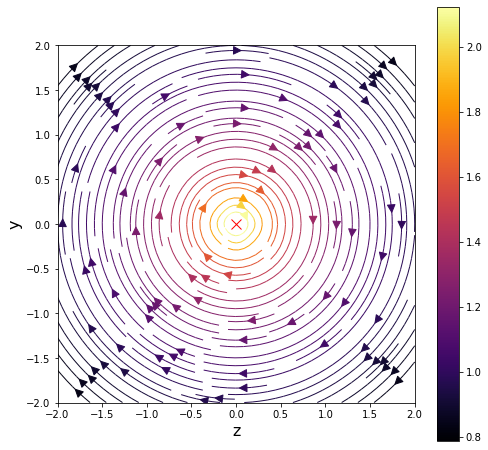

In [100]:
fig, ax1 = plt.subplots(1, figsize=(8,8))

print(test_bfield.shape)
magnitude_b_field = np.linalg.norm(test_bfield,axis=0)
print(magnitude_b_field.shape)

color = np.log10(magnitude_b_field[0] )   # colors the arrows based on field strength

print(color.shape)
z_points_at_constant_x = test_points_at_constant_x[2,0,:,:]
y_points_at_constant_x = test_points_at_constant_x[1,0,:,:]

z_component_bfield = test_bfield[2,0,:,:]
y_component_bfield = test_bfield[1,0,:,:]

strm=ax1.streamplot(z_points_at_constant_x, y_points_at_constant_x, z_component_bfield, y_component_bfield, color=color, linewidth=1, 
               cmap=plt.cm.inferno, density=1.5, arrowstyle='simple', arrowsize=1.5)

ax1.plot(0,0,'x', markersize=10, color='r')   # indicate the location of the wire

fig.colorbar(strm.lines)

ax1.set_aspect('equal')
ax1.set_xlim([-2,2])
ax1.set_ylim([-2,2])
ax1.set_xlabel('z', fontsize=16)
ax1.set_ylabel('y', fontsize=16)